In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding= "unicode_escape")
#to avoid encoding error we use unicode escape
df.shape

(11251, 15)

In [3]:
df.head() 

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
#drop blank/unrelated columns
df.drop(['Status','unnamed1'], axis = 1, inplace= True)
#axis=1 refers to whole row

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


here we can see that the last 2 columns with null values have been dropped.

In [7]:
pd.isnull(df)
#to see null or not null values

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
pd.isnull(df).sum()
#check for null values

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [9]:
#drop null values
df.dropna(inplace=True)

In [10]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int64')

In [51]:
#rechecking
pd.isnull(df).sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [11]:
df[['Age','Orders','Amount']].describe()
#describe returns statistical description of columns in df
#can also run dataframe_name.describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


# Exploratory data analysis

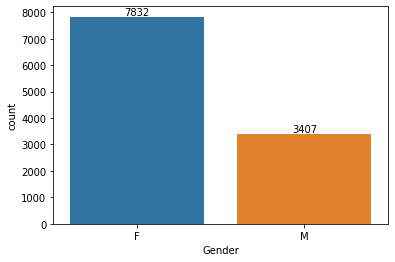

In [12]:
ax = sns.countplot(x="Gender", data=df)
#df[["Gender"]].describe()
for bars in ax.containers:
    ax.bar_label(bars)

In [13]:
#to see amount spent in total by both genders
df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)

,Gender,Amount
0,F,74335853
1,M,31913276


<AxesSubplot:xlabel='Gender', ylabel='Amount'>

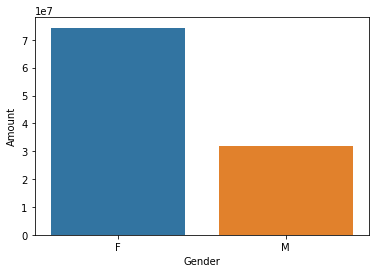

In [14]:
#plotting the above
sales_gen = df.groupby(['Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x="Gender",y="Amount",data=sales_gen)

here, we can actually visualize that women buy more things than men.

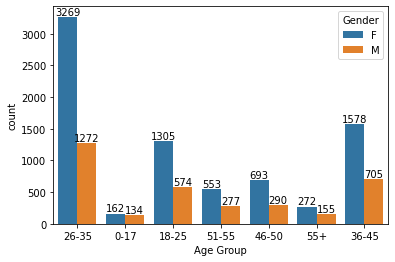

In [15]:
ax = sns.countplot(data=df, x='Age Group', hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Age Group', ylabel='Amount'>

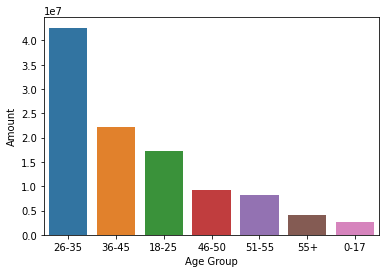

In [16]:
#determining the age group that has the most amount of buyers

sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Age Group', y='Amount',data=sales_age)

From the above graphs, we can see that the most number of buyers fall in the age group between 26-35 and are female.

<AxesSubplot:xlabel='State', ylabel='Orders'>

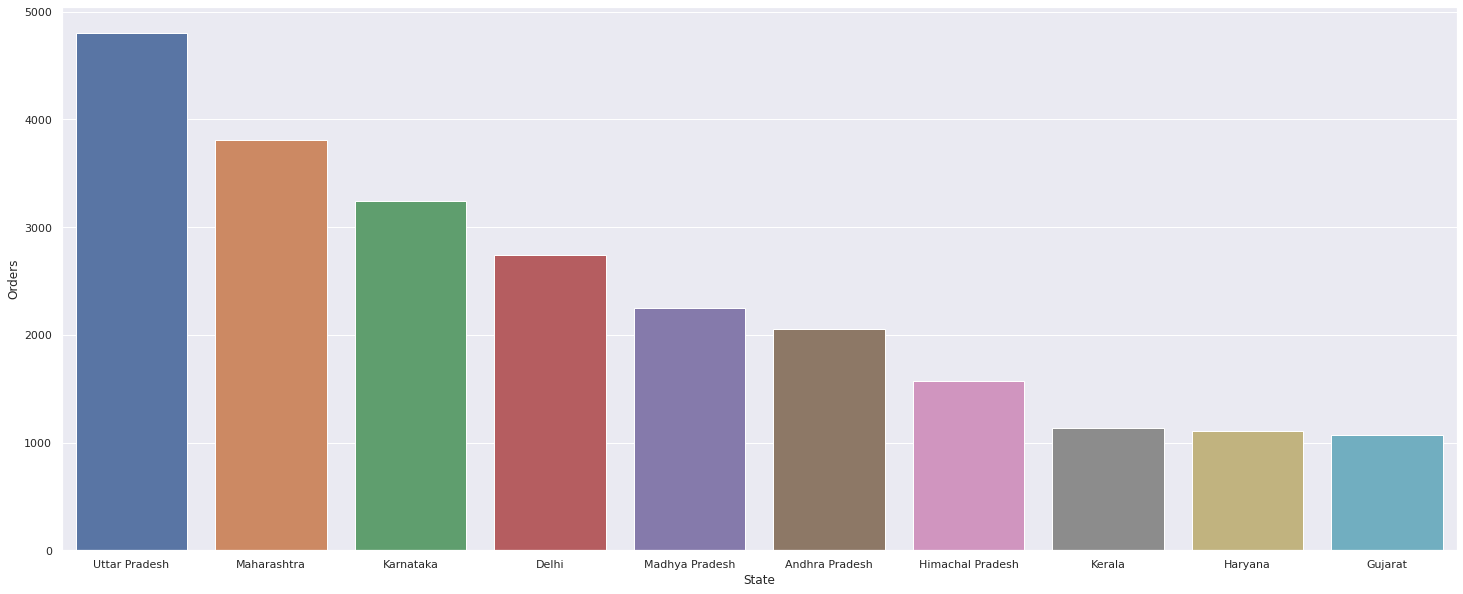

In [17]:
#plotting the total no. of orders from the top 10 states

state_orders = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x='State',y='Orders', data= state_orders)

<AxesSubplot:xlabel='State', ylabel='Amount'>

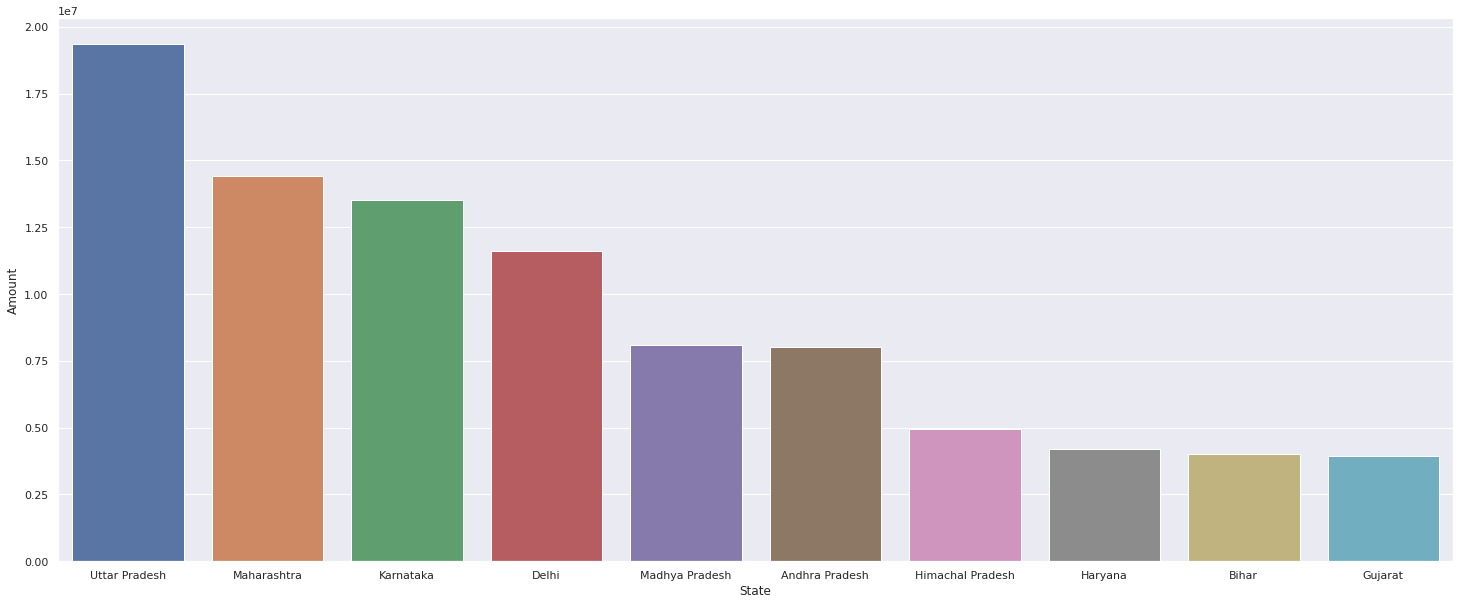

In [18]:
#plotting total sales (Amount) from each of these states

state_sales = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(25,10)})
sns.barplot(x= 'State', y= 'Amount', data=state_sales)

So, from the above two plots we can determine that UP, Maharashtra and Karnataka have the most amount of orders and therefore Sale amounts also compared to other states.

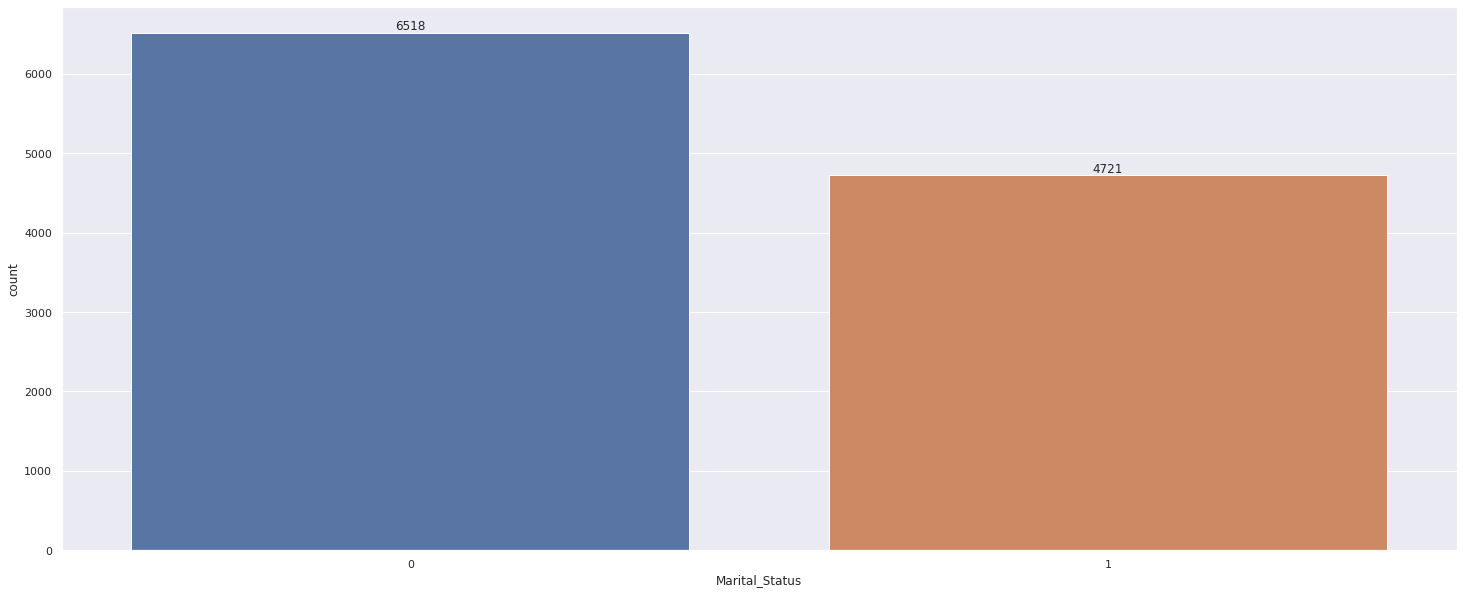

In [19]:
ax = sns.countplot(x='Marital_Status', data=df)

sns.set(rc={'figure.figsize':(5,3)})
for bars in ax.containers:
    ax.bar_label(bars)

Here, 0 = married, and 1 = unmarried.

<AxesSubplot:xlabel='Marital_Status', ylabel='Amount'>

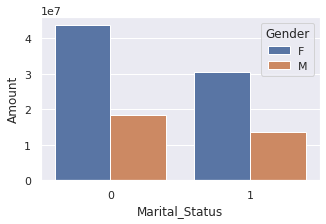

In [20]:
# plotting sales by marital status and gender.

sales = df.groupby(['Marital_Status','Gender'], as_index= False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=sales)

So from the above 2 graphs we can determine that most amount of buyers are married women.

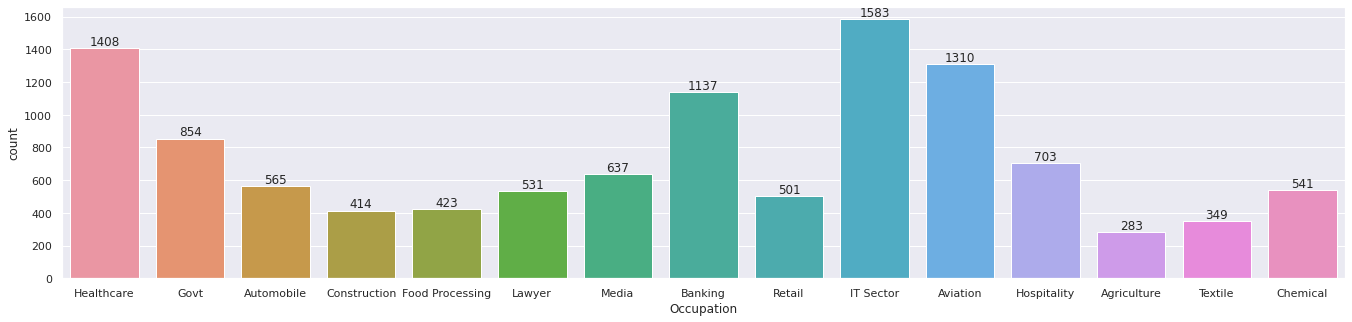

In [29]:
sns.set(rc={'figure.figsize':(23,5)})
ax = sns.countplot(x='Occupation', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

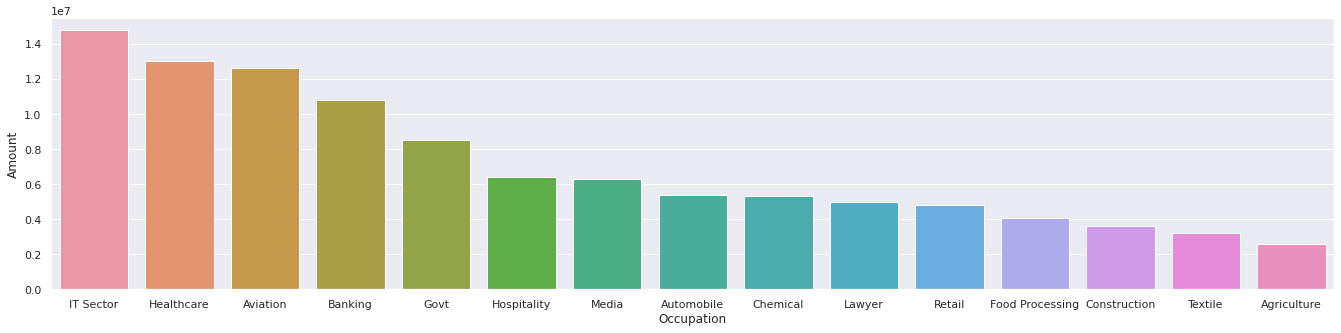

In [30]:
occ_amt = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(23,5)})
sns.barplot(x='Occupation',y='Amount', data=occ_amt)

The above graphs tell us that most buyers are from the IT and Healthcare sectors, and there were very less buyers from the Textile and Agriculture industries.

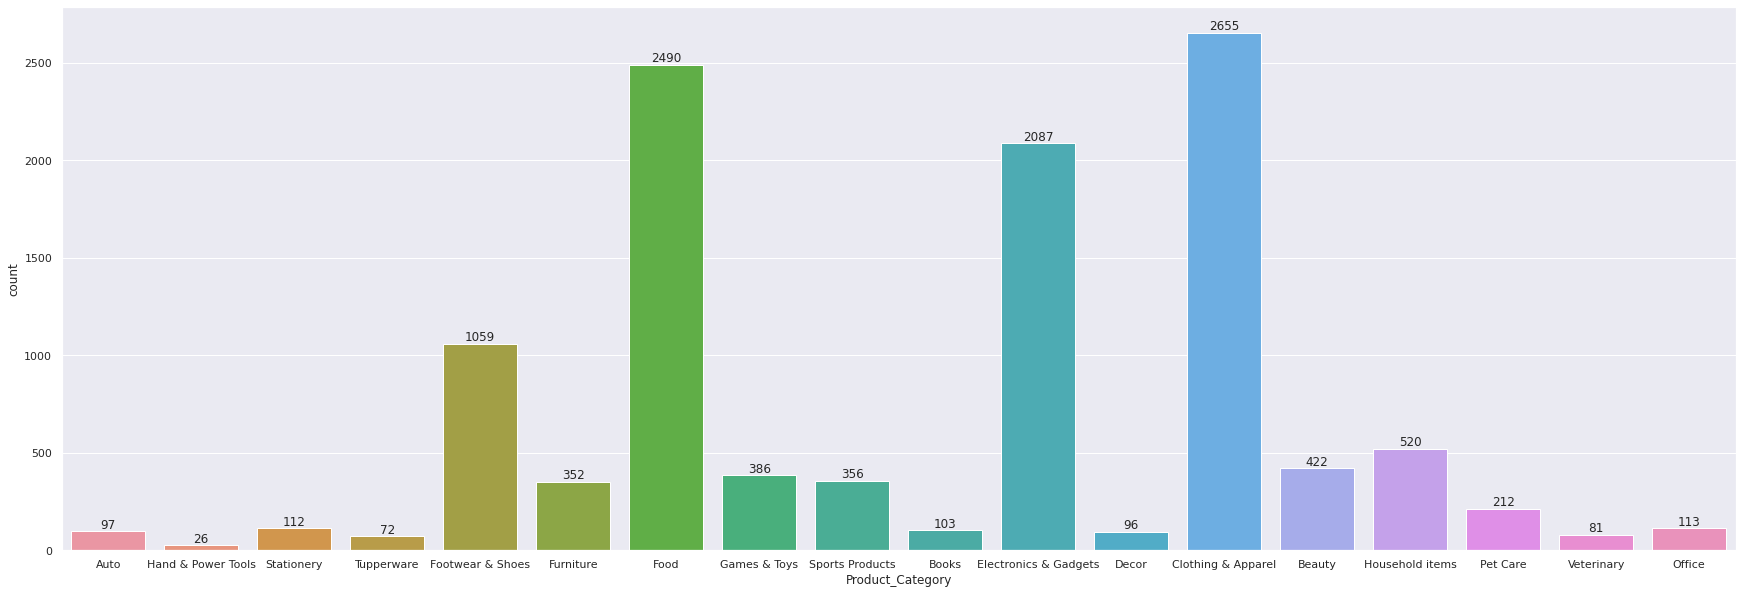

In [44]:
sns.set(rc={'figure.figsize':(30,10)})
ax = sns.countplot(x='Product_Category', data = df)

for bars in ax.containers:
    ax.bar_label(bars)

<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

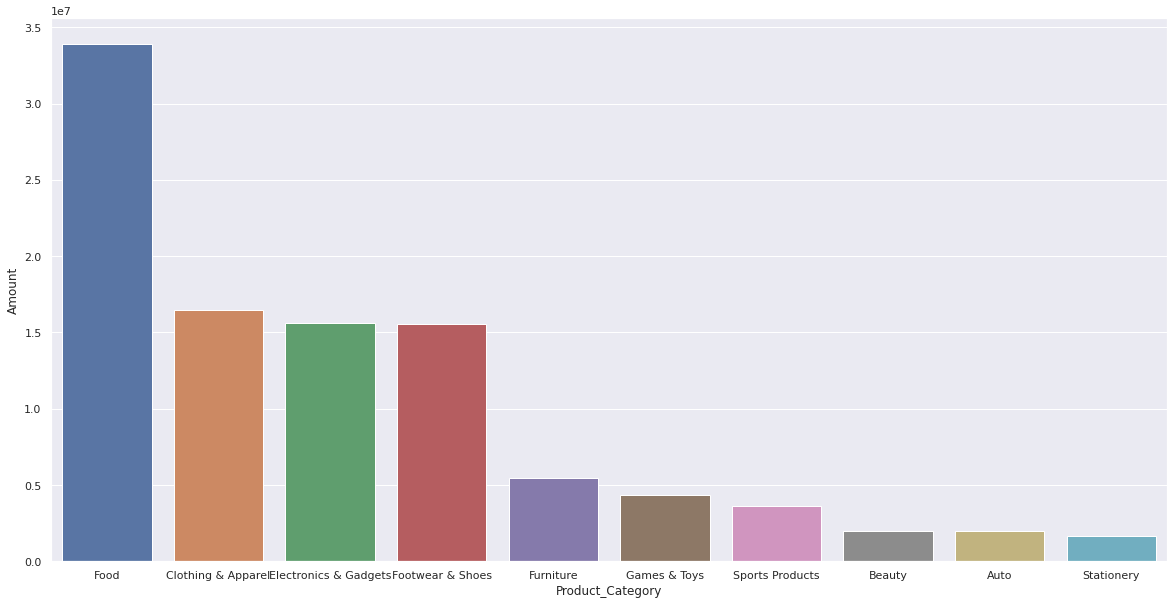

In [45]:
products = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,10)})
sns.barplot(x="Product_Category",y="Amount", data= products)

Most of the sold products were from Food, Clothing & Apparel and Electronics category.

In [46]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

<AxesSubplot:xlabel='Product_ID', ylabel='Orders'>

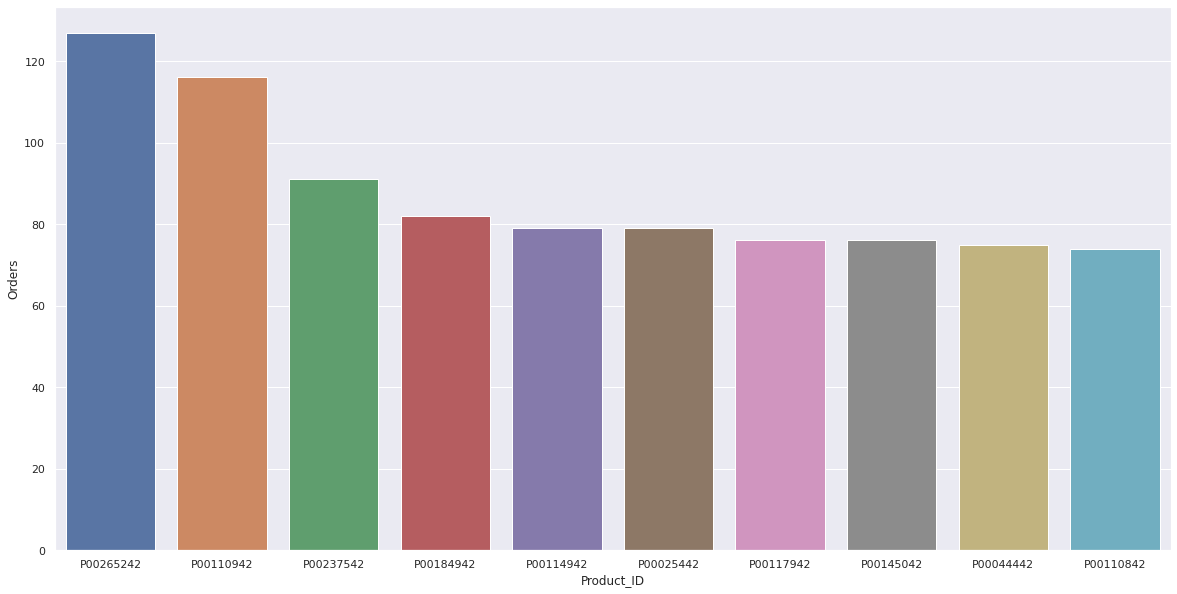

In [50]:
top_product = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)

sns.barplot(x='Product_ID',y='Orders', data= top_product)

These are the product IDs of the top 10 most sold products in this Diwali sale.